<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [1]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2024-04-01 at 15:06:10


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [3]:
#from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, META, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [9]:
start = datetime.datetime(2019, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','META','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG'
           ,'YELP','ZM', 'DBX', 'ADBE']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

#### Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [10]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2024-03-22    429.700012  429.859985  426.070007  428.739990  428.739990   
2024-03-25    425.239990  427.410004  421.609985  422.859985  422.859985   
2024-03-26    425.609985  425.989990  421.350006  421.649994  421.649994   
2024-03-27    424.440002  424.450012  419.010010  421.429993  421.429993   
2024-03-28    420.959991  421.869995  419.119995  420.720001  420.720001   

Stock Ticker                  AAPL                                      ...  \
Stock Info      Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2024-03-22    17636500  171.759995  173.050003  170.059998  172.279999  ...   
2024-03-25    18060500  170.570007  171.940002  169.449997  170.850006  ...   
2024-03-26    16725600  170.000000  171.419998  169.580002  169.710007  ...   
2024-03-27    16705000  170.410004  173.600006  170.110001  173.309998  ...   
2024-03-28    21871200  171.750000  172.229996  170.509995  171.479996  ...   

Stock Ticker        DBX                                       ADBE  \
Stock Info          Low      Close  Adj Close   Volume        Open   
Date                                                                 
2024-03-22    24.070000  24.350000  24.350000  3805900  509.070007   
2024-03-25    24.208000  24.270000  24.270000  2861400  496.790009   
2024-03-26    24.270000  24.450001  24.450001  3046500  508.059998   
2024-03-27    24.184999  24.440001  24.440001  3753800  515.469971   
2024-03-28    24.080000  24.299999  24.299999  3309600  508.119995   

Stock Ticker                                                           
Stock Info          High         Low       Close   Adj Close   Volume  
Date                                                                   
2024-03-22    511.589996  496.670013  499.519989  499.519989  5410300  
2024-03-25    510.630005  496.690002  507.230011  507.230011  4277000  
2024-03-26    512.789978  503.589996  507.600006  507.600006  2813300  
2024-03-27    516.859985  499.700012  504.399994  504.399994  4228400  
2024-03-28    509.000000  500.260010  504.600006  504.600006  3897000  

[5 rows x 120 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

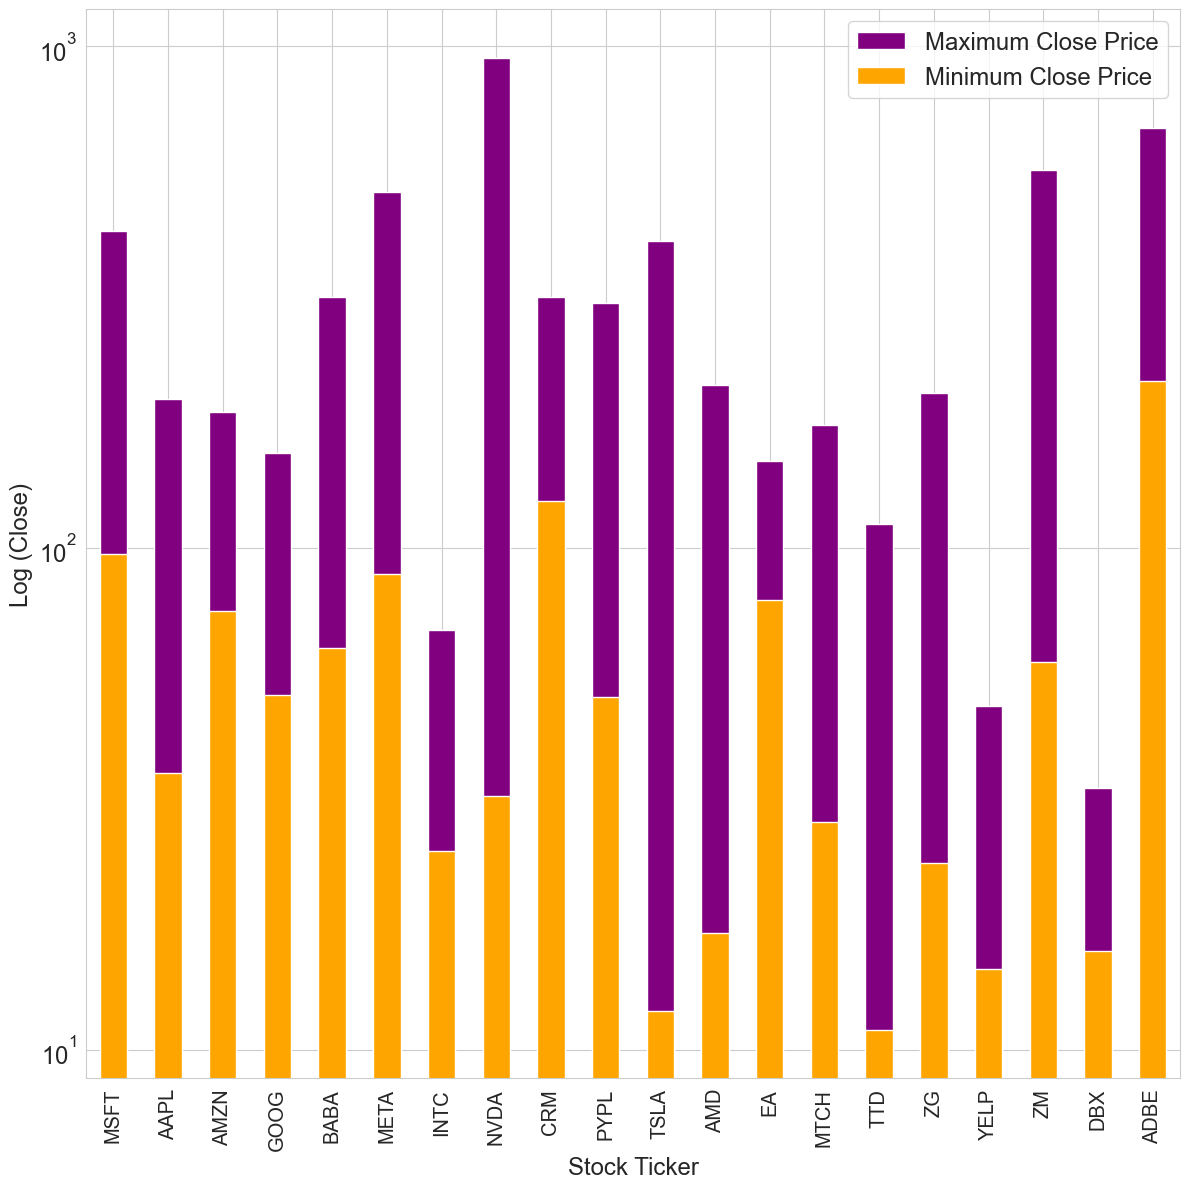

In [11]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TSLA

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Dec 2020')

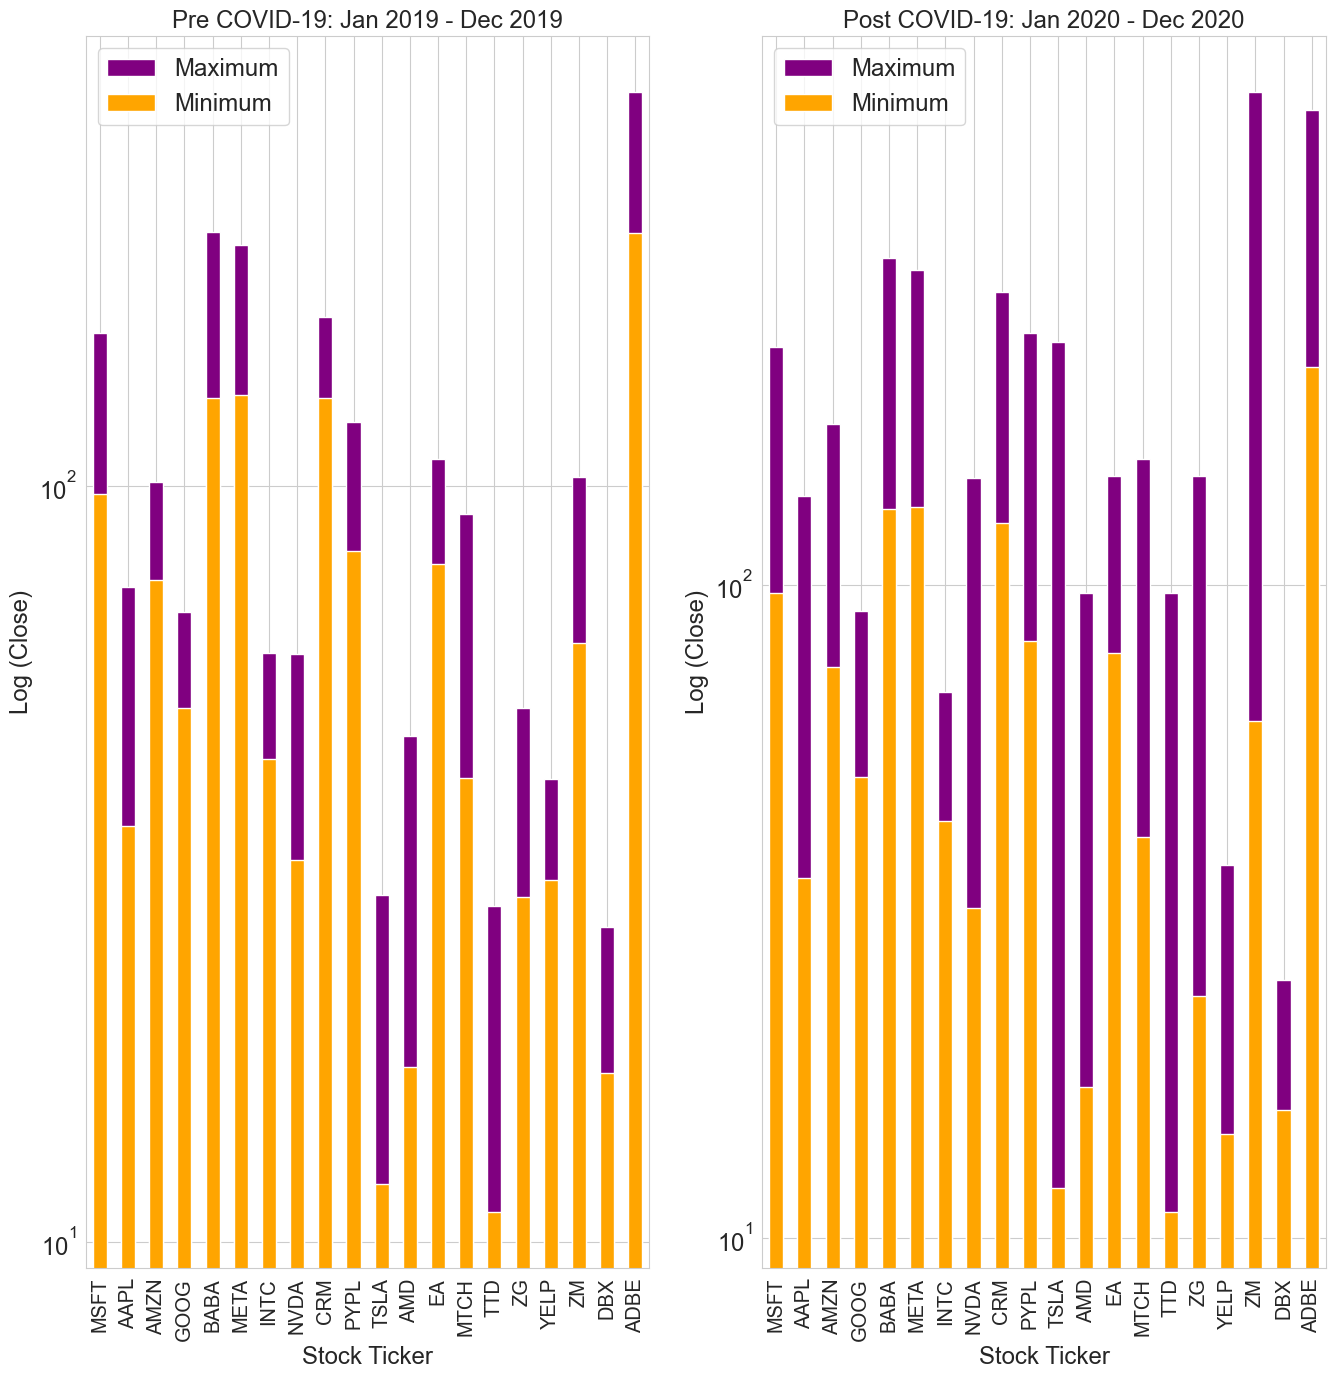

In [12]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Jan 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':'2020-12-31'].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2020-12-31'].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Dec 2020')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [13]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,META Return,INTC Return,NVDA Return,CRM Return,PYPL Return,TSLA Return,AMD Return,EA Return,MTCH Return,TTD Return,ZG Return,YELP Return,ZM Return,DBX Return,ADBE Return
Date,,,,,,,,,,,,,,,,,,,,
2024-03-22,-0.001467,0.005310,0.004042,0.020371,-0.023026,0.003584,0.003536,0.031213,-0.002011,-0.020714,-0.011515,0.005429,-0.005888,0.001681,0.000000,-0.010930,0.001549,-0.008717,-0.002049,-0.022944
2024-03-25,-0.013715,-0.008300,0.004696,-0.004085,-0.009289,-0.012873,-0.017383,0.007562,-0.005556,0.018990,0.010537,-0.005678,-0.008960,-0.011469,0.029274,-0.023709,-0.012890,0.011371,-0.003285,0.015435
2024-03-26,-0.002861,-0.006673,-0.007846,0.003639,0.000280,-0.014174,0.003825,-0.025694,-0.000752,0.010151,0.029195,-0.004255,0.002911,0.009338,-0.005711,-0.009879,-0.001045,-0.005397,0.007417,0.000729
2024-03-27,-0.000522,0.021213,0.008581,0.001582,0.001539,-0.004094,0.042391,-0.024967,-0.014551,-0.001500,0.012157,0.009670,0.007410,0.005887,0.001838,0.031179,0.022222,0.004069,-0.000409,-0.006304
2024-03-28,-0.001685,-0.010559,0.003058,0.002106,0.010756,-0.016766,0.009139,0.001175,-0.000664,0.006309,-0.022466,0.005011,0.006067,0.011148,0.002408,-0.035275,0.007673,-0.018763,-0.005728,0.000397


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [14]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2022-04-29
GOOG Return   2020-03-16
BABA Return   2020-12-24
META Return   2022-02-03
INTC Return   2020-03-16
NVDA Return   2020-03-16
CRM Return    2020-03-16
PYPL Return   2022-02-02
TSLA Return   2020-09-08
AMD Return    2020-03-12
EA Return     2019-02-06
MTCH Return   2022-08-03
TTD Return    2021-05-10
ZG Return     2020-03-16
YELP Return   2020-03-16
ZM Return     2020-11-09
DBX Return    2024-02-16
ADBE Return   2022-09-15
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [15]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2022-02-04
GOOG Return   2019-07-26
BABA Return   2022-03-16
META Return   2023-02-02
INTC Return   2020-03-13
NVDA Return   2023-05-25
CRM Return    2020-08-26
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2022-08-10
ZG Return     2019-02-22
YELP Return   2020-04-29
ZM Return     2020-09-01
DBX Return    2020-02-21
ADBE Return   2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

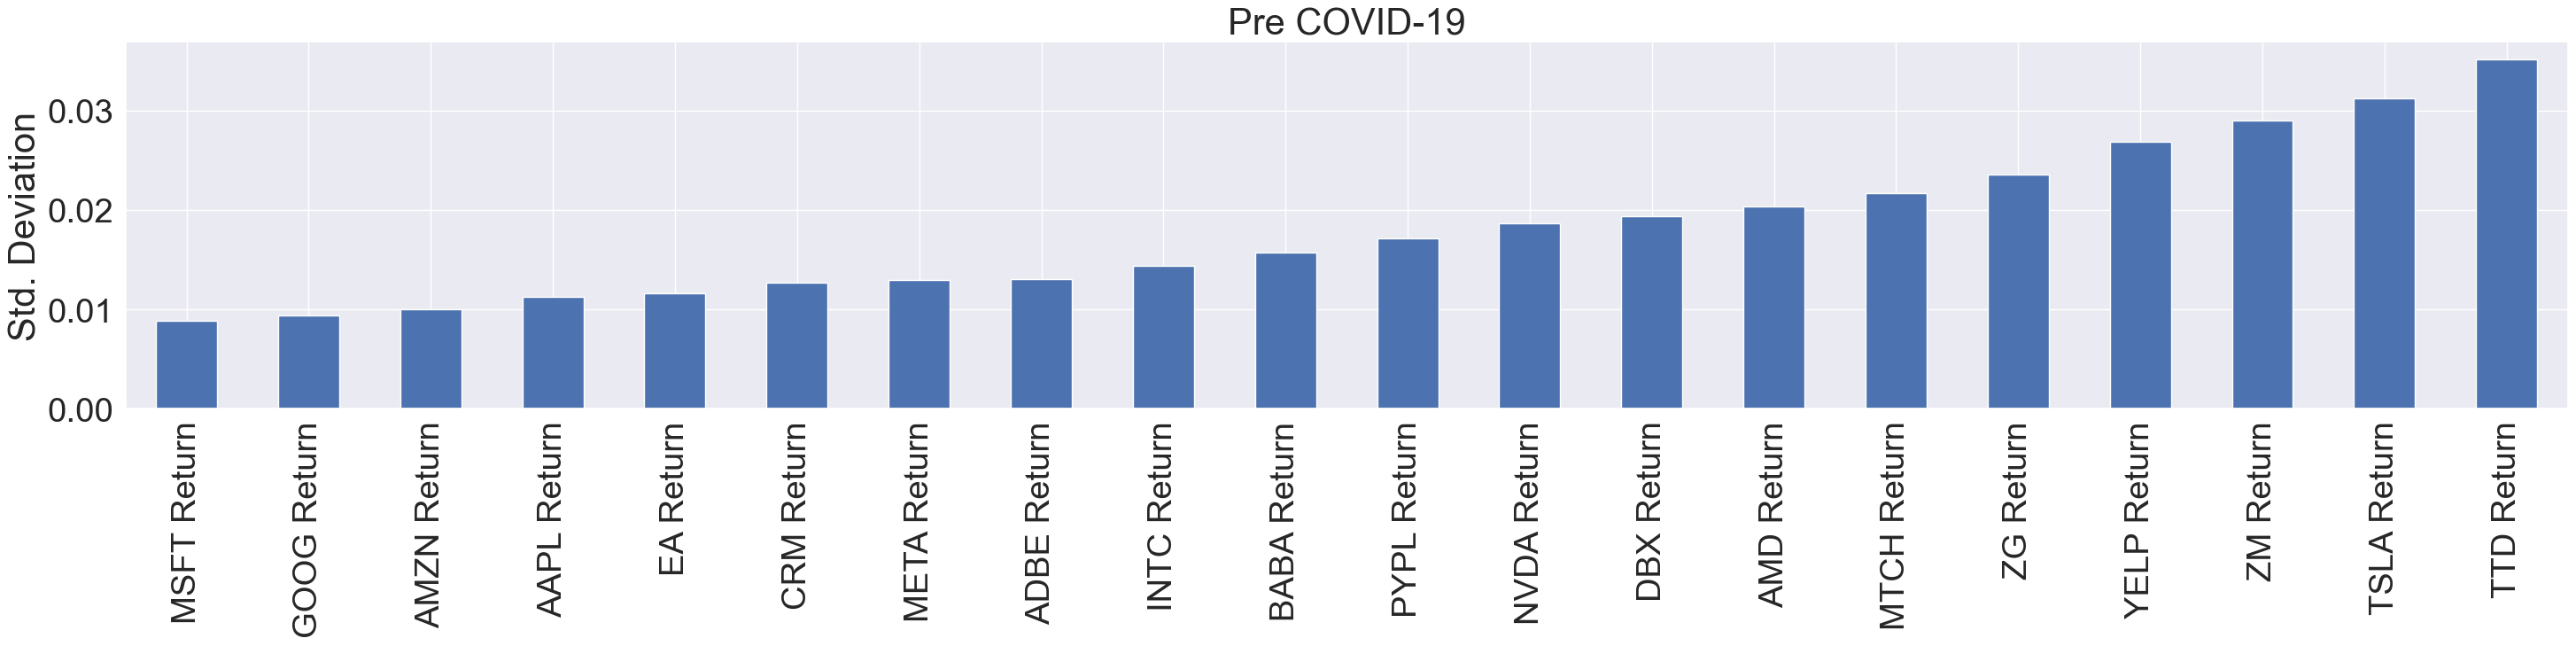

In [16]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

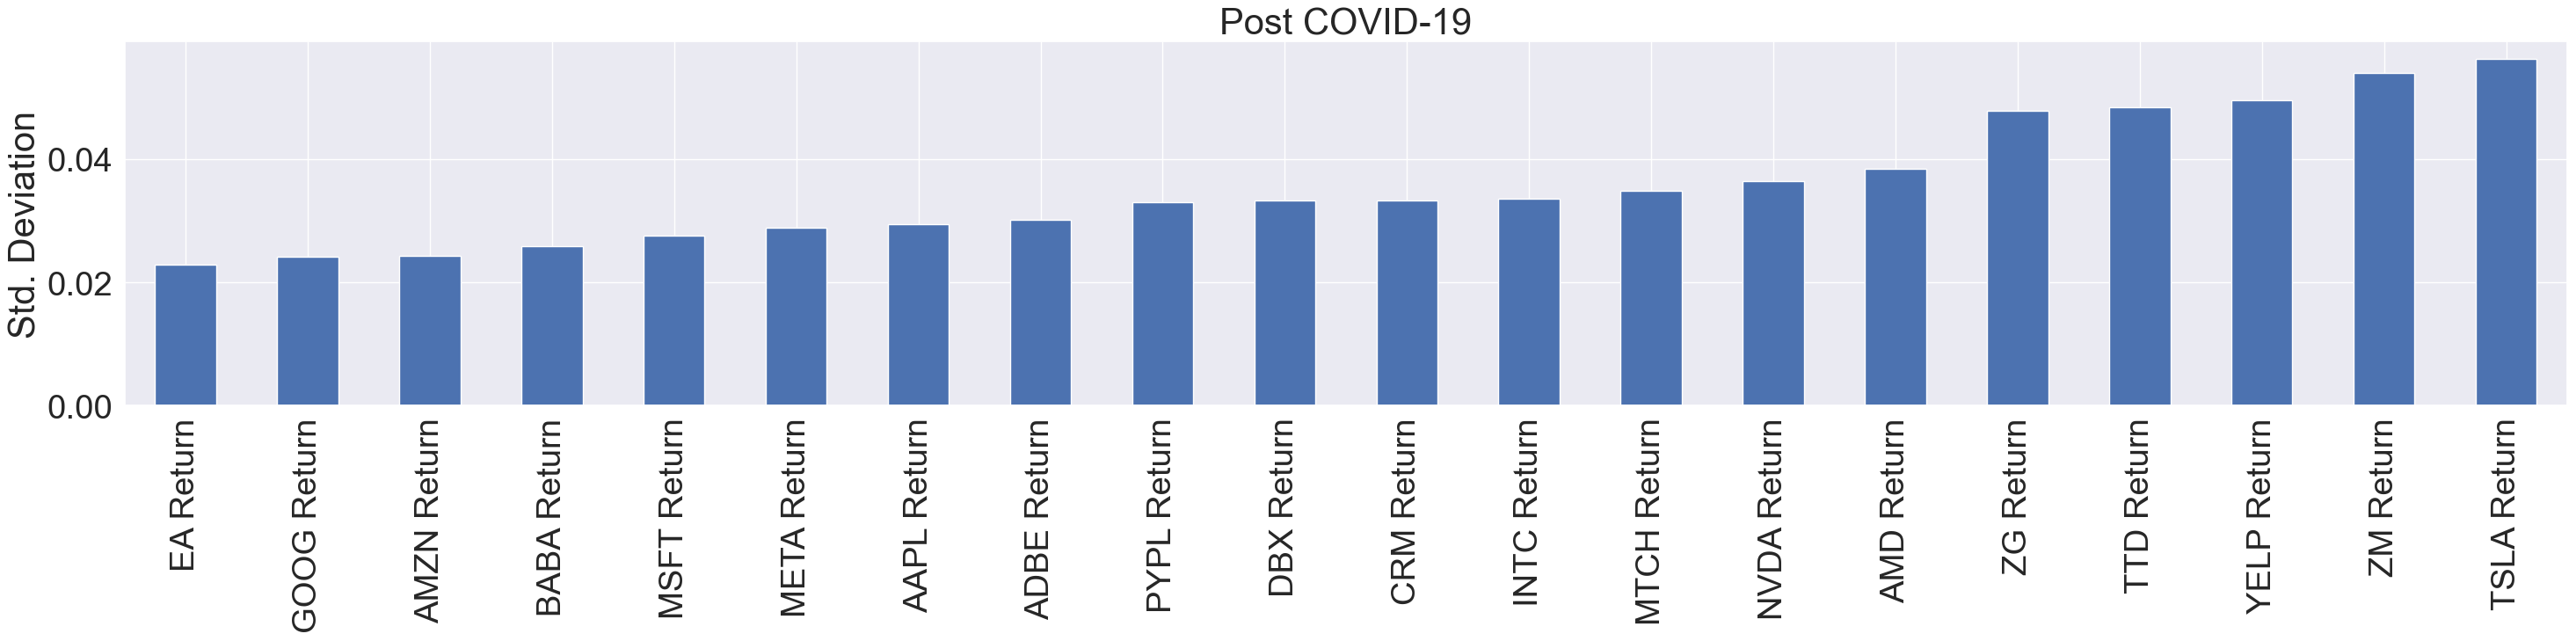

In [17]:
post_corona=returns.loc['2020-01-01':'2020-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

In [18]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM','META']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM'],df_map['META']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

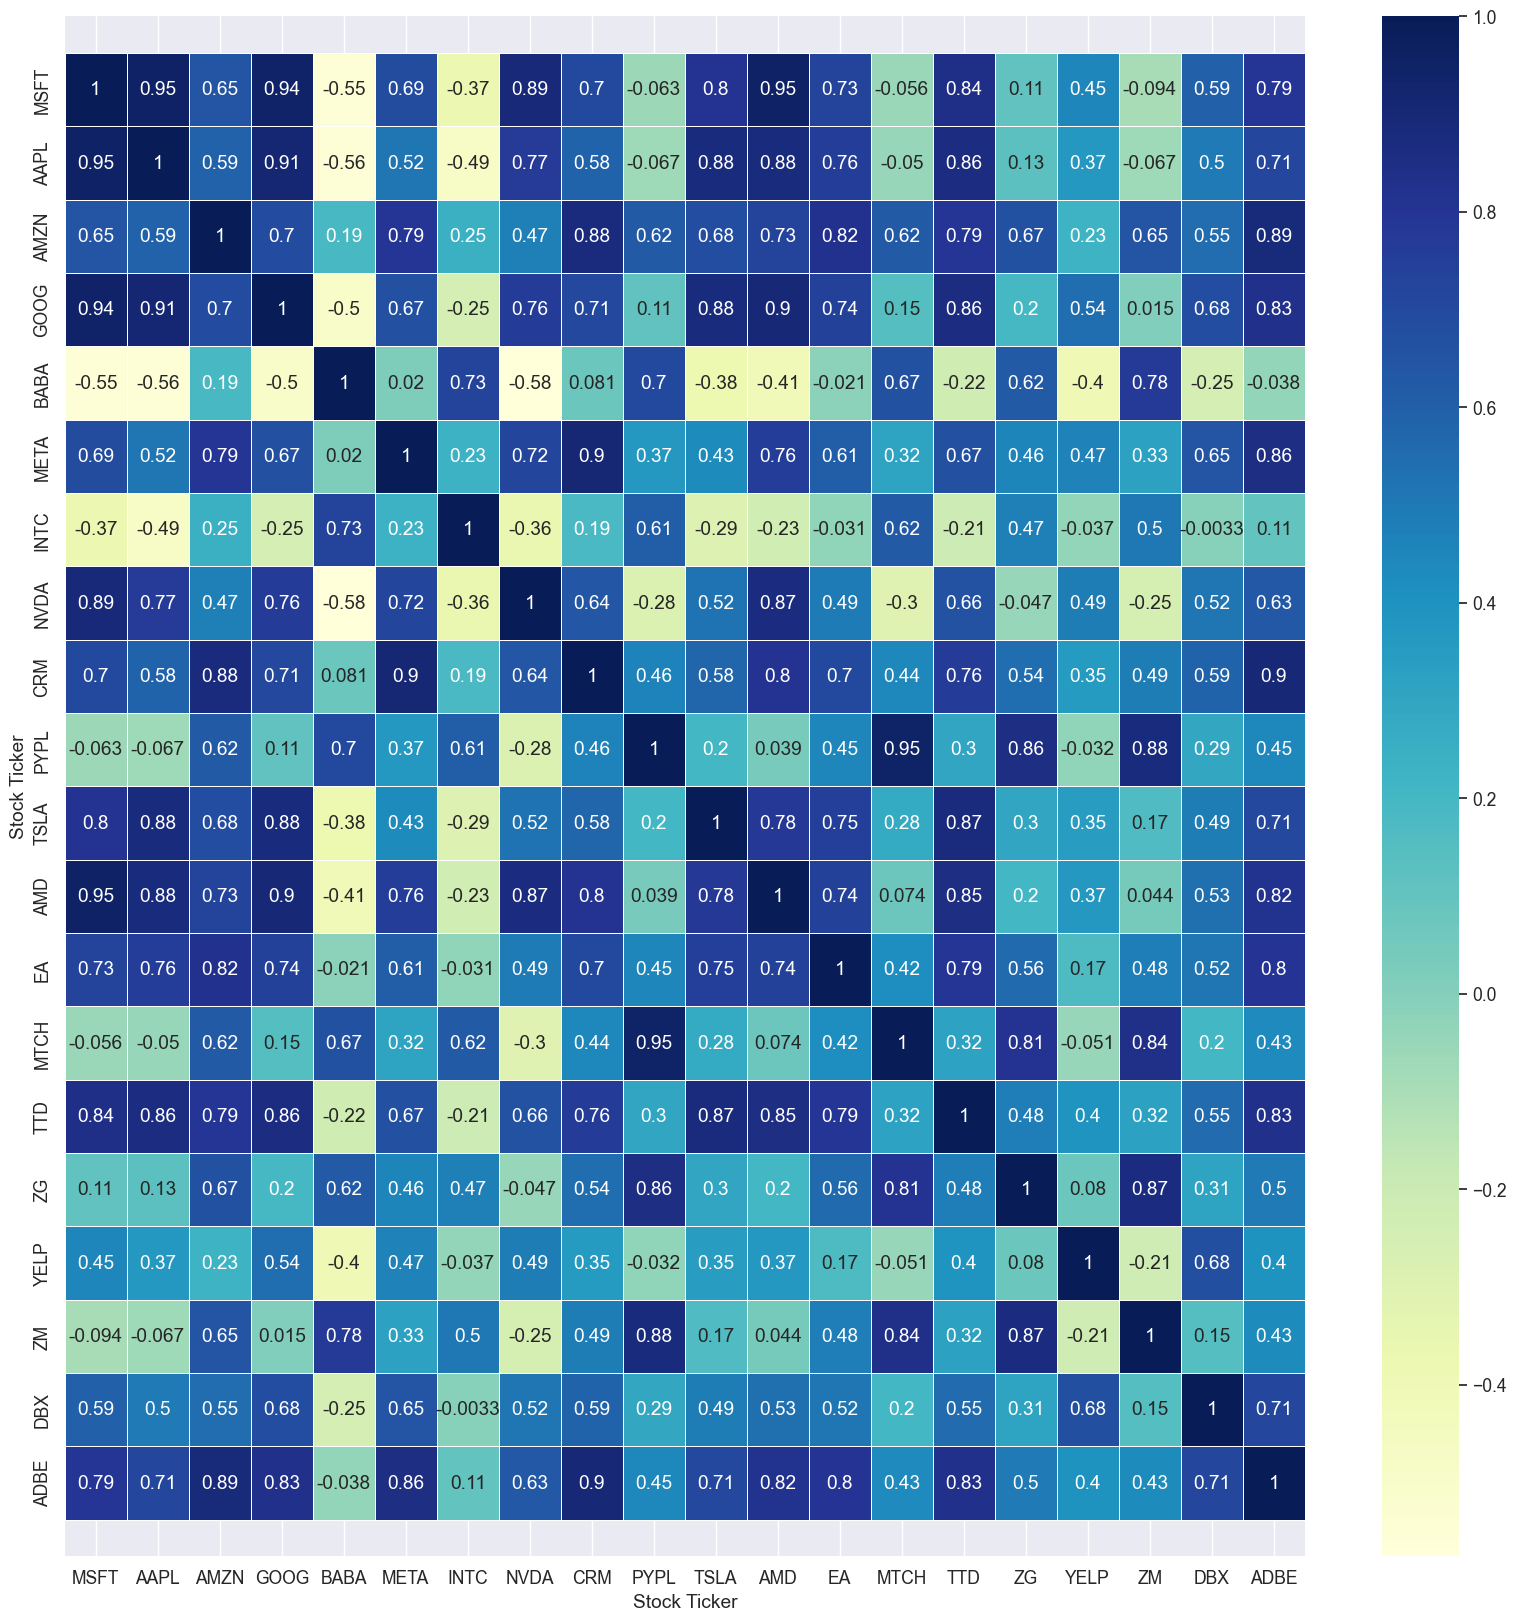

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='YlGnBu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()

### Comparison in some "Tech-giant" stocks before and after layoffs

In [96]:
selected_tickers_compare = ['META','AMZN','GOOG','MSFT']
selected_tech_stocks_compare = pd.concat([df_map['META'],df_map['AMZN'],df_map['GOOG'],df_map['MSFT']],axis=1,keys=selected_tickers_compare)
selected_tech_stocks_compare.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks_compare.xs(key='Close',axis=1,level='Stock Info').loc['2022-04-01':current_date_str].iplot(title = "Comparison in some Tech-giant stocks before and after layoffs",width=3.5)

### Predicting Stock Prices using LSTM model: Case study for AAPL stock

In [113]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [114]:
import yfinance as yf
start = datetime.datetime(2019, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845039,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075397,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530052,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450977,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126781,164101200


In [115]:
df.reset_index().iplot(x='Date', y='Close', title='AAPL Close Prices Over Time',width=3.5)

In [116]:
df2 = df.reset_index()['Close']

In [117]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(1319, 1)

In [118]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [119]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [120]:
# calling the create dataset function to split the data into 
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [121]:
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(756, 100)
[[0.02419069 0.         0.00933486 ... 0.06242214 0.05762399 0.05656286]
 [0.         0.00933486 0.00882736 ... 0.05762399 0.05656286 0.05542483]
 [0.00933486 0.00882736 0.01316416 ... 0.05656286 0.05542483 0.05411765]
 ...
 [0.8842291  0.8847828  0.87752401 ... 0.69937719 0.64758174 0.6262361 ]
 [0.8847828  0.87752401 0.87364864 ... 0.64758174 0.6262361  0.62771239]
 [0.87752401 0.87364864 0.90096113 ... 0.6262361  0.62771239 0.66166859]]
(361, 100)
(361,)


In [122]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 3s 112ms/step - loss: 0.0780 - val_loss: 0.0482
Epoch 2/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0121 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0050 - val_loss: 0.0086
Epoch 4/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 5/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 8/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 10/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0016 - val_loss: 0.00

12/12 [==============================] - 1s 88ms/step - loss: 6.3014e-04 - val_loss: 9.4129e-04
Epoch 81/100
12/12 [==============================] - 1s 86ms/step - loss: 6.6227e-04 - val_loss: 7.8837e-04
Epoch 82/100
12/12 [==============================] - 1s 85ms/step - loss: 6.4079e-04 - val_loss: 7.7273e-04
Epoch 83/100
12/12 [==============================] - 1s 85ms/step - loss: 6.4716e-04 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 1s 83ms/step - loss: 6.2580e-04 - val_loss: 7.5191e-04
Epoch 85/100
12/12 [==============================] - 1s 83ms/step - loss: 7.0010e-04 - val_loss: 7.6327e-04
Epoch 86/100
12/12 [==============================] - 1s 82ms/step - loss: 6.3888e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 1s 82ms/step - loss: 8.6649e-04 - val_loss: 0.0015
Epoch 88/100
12/12 [==============================] - 1s 84ms/step - loss: 6.3235e-04 - val_loss: 0.0014
Epoch 89/100
12/12 [============================

In [145]:
train_predict = model.predict(X_train)

24/24 [==============================] - 0s 12ms/step


In [146]:
test_predict = model.predict(X_test)

12/12 [==============================] - 0s 11ms/step


In [147]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [148]:
look_back = 100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [149]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

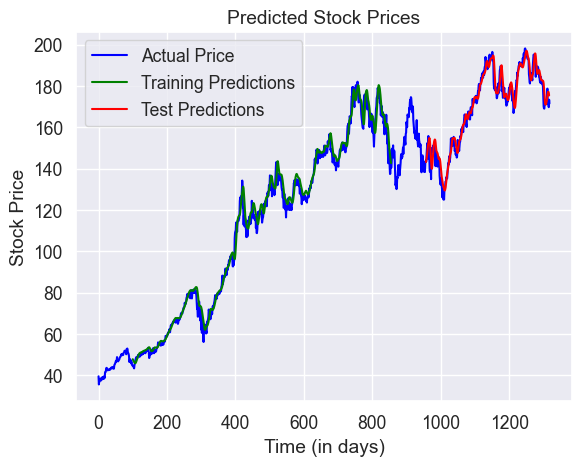

In [155]:
plt.plot(scaler.inverse_transform(df2), label='Actual Price', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='green')
plt.plot(testPredictPlot, label='Test Predictions', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices')
plt.legend()
plt.show()

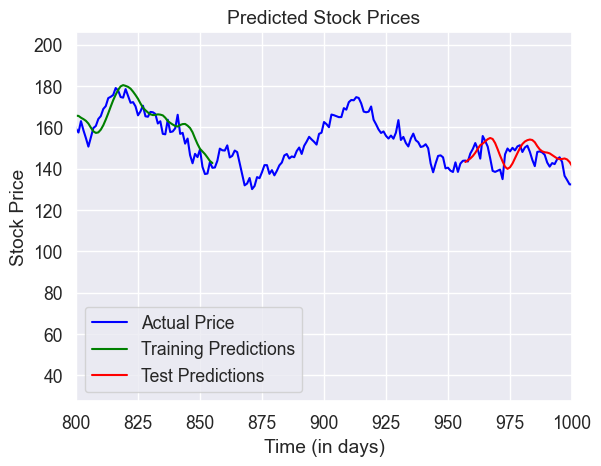

In [156]:
plt.plot(scaler.inverse_transform(df2), label='Actual Price', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='green')
plt.plot(testPredictPlot, label='Test Predictions', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices')
plt.legend()
plt.xlim(800, 1000)
#plt.ylim(lower_limit, upper_limit)
plt.show()